In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio

import matplotlib.pyplot as plt
import IPython.display as ipd
from tqdm import tqdm

from torchaudio.datasets import SPEECHCOMMANDS
import os

# Create training and testing split of the data. We do not use validation in this tutorial.
train_set = SPEECHCOMMANDS("./",subset="training",download=True)
#test_set = SubsetSC("testing")
test_set = SPEECHCOMMANDS("./",subset="testing",download=True)


waveform, sample_rate, label, speaker_id, utterance_number = train_set[0]

#labels = sorted(list(set(datapoint[2] for datapoint in train_set)))
#print(labels)
#all_labels=set()
#all_speakers=set()
#for datapoint in tqdm(train_set):
#    waveform, sample_rate, label, speaker_id, utterance_number = datapoint
#    all_labels.add(label)
#    all_speakers.add(speaker_id)

#print("{} speakers".format(len(all_speakers)))
#print("{} labels".format(len(all_labels)))
my_labels=["UNKNOWN","backward","forward","left","right","stop"]

C:\Users\grybk\AppData\Roaming\Python\Python38\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


In [2]:
all_labels={'backward', 'visual', 'two', 'four', 'five', 'learn', 'nine', 'on', 'eight', 'bed', 'cat', 'marvin', 'no', 'zero', 'stop', 'dog', 'happy', 'wow', 'down', 'house', 'off', 'yes', 'follow', 'seven', 'left', 'six', 'bird', 'up', 'three', 'forward', 'one', 'tree', 'sheila', 'right', 'go'}
all_speakers={'71bf8f48', '62ef962d', 'e6be0830', 'e92b6401', '5ac04a92', '92b2bf59', '1e9b215e', 'c4a7a867', '3ab9ba07', '71d0ded4', '2748cce7', '66276b0e', '26e517a4', '3006c271', 'b0ae6326', '15574821', 'ae92fa32', 'eb3f7d82', '99a9b015', 'f478ba44', '8549f25d', '54aecbd5', '33246bc2', '83f9c4ab', 'a97c6445', '67bdbf56', '708b8d51', 'de040337', '0bfec55f', '05d18852', '34881b10', '4a4e28f1', 'fb9d6d23', '542f38a2', '682e1687', '99e6cab8', '1cbcc7a7', 'ace072ba', 'a7545b9f', '29229c21', 'bfa63751', '36050ef3', 'b01c8f61', 'f5341341', 'b1114e4f', '8e523821', 'fe11e258', '6cb6eee7', 'f816db77', '0ff728b5', '2e7fac30', '1d1fe0a0', 'd486fb84', '5188de0d', '1c45ceb2', '5e25eeef', '6ac35824', '95fd5a0f', '70b0ccf4', '299c14b1', 'efbb27a6', '1338a799', '37b03ab1', '00b01445', 'a42a88ff', 'a879a2c3', 'dcbfe008', '3fdafe25', '403a4d3e', 'a04817c2', '69a1a79f', '56cd307a', '019fa366', '05739450', '20d779bf', '093f65a1', 'cd911ace', '235b444f', 'f5733968', '1e31353f', '7ff4fc72', '4bba14ce', '7f581e94', '35c29afe', '25c14394', 'f01a0d63', '3a53b856', '32efce64', 'bde0f20a', '62b7c848', '66cbe2b3', '0132a06d', 'b6573c88', 'a0f93943', 'd85270c1', 'b84f83d2', 'e2286c18', 'c8b904e3', '0a5636ca', '187af8be', '560c5be4', '8c4854bc', 'c44d2a58', '87eff300', '5f9cd2eb', '3b195250', '90645155', '5ba724a7', 'bfdb9801', 'c0fb6812', 'f30285c8', '1ed0b13d', 'ffd2ba2f', '2927c601', '18a8f03f', '9d7036f9', 'fb01a182', 'ad1429cf', '0616de09', '4a1e736b', '8c7b691a', '3ae5c04f', 'c5570933', '211ccd2e', 'b71ebf79', '30a09789', 'dec73123', 'cf68fad2', '61a0d340', '6ceeb9aa', 'ae82c78c', 'ec201020', '06a79a03', '3847619e', 'd1b4694a', '5e033479', '6a203e0e', 'c93d5e22', '39025b21', '7d86b703', 'e8b6f6fe', '2ad772d6', 'ac652c60', '48463cbc', '1930353c', '106a6183', 'd6265c56', '312d6d81', 'c2657ba5', '6e2ef3d5', '2250f5f2', '02746d24', '6add0595', '434a267c', '59b98a22', '7cfb1618', '86b1500e', '3b3d2f59', '7a5530c9', '56f8a100', '1ffd513b', 'feb1d305', 'd6b155a5', 'e9abfe31', 'ca4eeab0', 'eb609143', 'bdb90d38', '34805883', '329eab8a', 'a583c5b0', '93b62ffd', 'a24582a0', 'b59fe16d', '44dad20e', '38c388bc', 'cd997d46', 'c53b335a', '476e02f8', 'c578beb0', '3f45a0cf', 'a685a59d', '6640fdc0', '79903546', 'd0f7bef5', '9886d8bf', 'a3255f5c', 'e7d0eb3f', '2fcb6397', '5f1b1051', 'ac4b3fc3', 'd3c2470e', 'a74f3917', 'be0f2293', 'bf4af1af', '4fce7686', '3402e488', 'cae62f38', '462dca36', 'f618568f', '834f03fe', '3411cf4b', 'd78858d9', 'f8f60f59', 'be91a00a', '487709e7', '53458368', 'c08e5058', '042186b8', '982babaf', '9205fb3c', '41474817', '0a196374', '96105282', 'aa1645d3', 'ef3367d9', 'f21893dc', '8cb707fc', 'f9273a21', '64df20d8', '5ef35194', 'f19c1390', '196e84b7', '559bc36a', 'e652590d', '18ffa72d', '15c371c7', '528f9242', 'b5aacf2c', '1890e5c3', 'a73be046', '35be2cc3', '67fcdb05', 'a8688b67', '86f12ac0', '3852fca2', '8ff44869', '037c445a', 'c68cf200', '3bfd30e6', '9d8ac38b', 'e102119e', '1ba20be2', 'f192e6b4', '51f7a034', 'f216055e', '5d0ab165', '21307344', '659b7fae', 'c601833f', '6af4aa07', '0f7266cf', '0d6d7360', '10ace7eb', '82305c3a', 'c45c2b76', 'c2aeb59d', '4c3cddb8', '997867e7', 'b5935410', 'beb49c22', 'a56859ea', '4a803e67', 'f4386675', 'd8c52371', 'c7aaad67', '16fce7de', '402e2977', '72ca6a6d', '55463c16', 'f06190c1', '7ce8df21', '9f92fb7c', 'b10b0654', '4d9e07cf', 'ed3c2d05', '89947bd7', '3d3ddaf8', '5efb758c', 'd9d6559e', '8c780627', 'ccfd721c', 'f2f0d244', 'f5c3de1b', '32561e9e', '139b255d', '978240e1', '1a4259c3', 'd926bb17', '876c84d6', '5af0ca83', '97cbf436', 'e882abb2', '46a153d8', '3777c08e', '34d5aa5a', 'e4a2cf79', '5f47fdf9', 'dd664d92', '708a9569', '63f042c6', '023808be', '4d0d9906', '4b25f620', '69086eb0', 'fbe51750', '325a0c39', '878befa7', '7910d292', '773e26f7', '270bfa52', 'db9cfc88', 'e0344f60', '9a5db2cb', 'c351e611', '5184ed3e', '99081f4d', 'dce05676', '4a671512', '17cc40ee', '26631bee', '0943c746', '0ac15fe9', 'bb6d4301', 'b8897f1c', 'e2362167', 'b959cd0c', 'b87bdb22', 'ca6d5cd1', 'e4be0cf6', 'dc269564', '6a1908f8', 'a1cff772', '3ee0fc39', '6e74c582', 'bab36420', '893b3c11', '772db621', 'd31d8dd7', 'd5c41d6a', '11b1df78', 'acb9db68', '8e884ec4', '271d51c0', 'acfd5b5e', 'c1cc6e95', 'e77d88fc', '66e8a4ec', '365908bd', '6272b231', 'd1453a87', 'cc3d1613', '71aa5b54', '44e9d8d2', '462e1919', '616420be', '8012c69d', '8911b8d2', 'b4ea0d9a', '8134f43f', '28ce0c58', '98f4f088', '27b03931', '840eab5a', '3d9bbe2d', '29192d51', '779de043', 'c41d9052', '24b82192', '3ea77ede', 'ed032775', '0c2d2ffa', '6a700f9d', '9acd0254', '77ac58c5', '4f558007', '4abb2400', 'da2c5f1b', '09ddc105', '338dacf5', 'a4ca3afe', '726382d6', '07089da9', '1589451d', 'b087aa0e', 'f9f9751d', 'bdd22e4d', '96c88089', 'e855b8f1', 'de4f7798', 'f19d1738', 'cdee383b', 'f0659908', 'fc3ba625', '66041c69', '31e686d2', '7c2a3fa4', '190821dc', '2197f41c', 'b9f46737', '6c9223bd', '9f7079fe', '627c0bec', 'f5d09ebd', '39a45230', 'e9a76b2f', 'a97017df', '98ea0818', '6f5eea74', 'a5a16097', 'e0ff1e9c', 'b8872c20', '8a28231e', '85b877b5', '1ecfb537', 'e12c25b5', 'ee28caac', '686d030b', '977a3be4', '6d1dcca6', 'cb72dfb6', 'bbbf4fbd', '9b402bc2', 'e2633cf5', '339f2c5c', '3c8dc702', '6ef407da', 'eeaf97c3', 'bbd0bbd0', 'de650823', 'c661be6e', '1e8044b4', '6f1ffef6', 'a9b4c2ef', 'c0c0d87d', '5677ec77', 'f1d8a638', '92a9c5e6', 'd2f4f431', 'f2898d06', '53578f4e', 'ba59cab3', 'a928cc5b', 'f810e799', '8e69dc2f', '2aec99ec', '65303f47', 'd9d08edd', '65d81c54', 'f15a354c', 'fb727898', 'a2fefcb4', '4649256f', 'e10e2cbb', 'db8a3397', 'c205e625', 'd8a5ace5', '012c8314', '3209ec42', '723efc4c', '1c1060b1', 'ec989d6d', '5e3b7a84', 'a3502f15', '86f3558f', '9c06a3f3', '26a093e1', '11379f4d', '4cb874bb', '3f339c33', '71f9bba8', '6aa8def4', '2cf28b70', '61482e52', '8931f494', 'cd8b1781', 'c22ebf46', 'c9b653a0', '42c6fff1', '3e3b65eb', '1a6eca98', 'dd6c6806', '951cac20', '5a9f7324', '857366dd', '4c432947', 'a19a0225', '1970b130', '33b5516a', 'fce65496', '13a93b33', 'ea0cf37f', 'e9e07a2d', '9a76f8c3', 'cce7416f', '3a69f765', 'b15fc37d', '0b7ee1a0', '6a497f80', '7f208e83', '02e85b60', 'd3a18257', 'd4dddb92', '589bce2c', 'efab2cbd', '9beccfc8', '2d3c8dcb', '8e05039f', '023a61ad', 'b65f6015', 'acfd3bc3', '1851e33b', 'cdfbbe75', '4ec7d027', '89ed36ab', '9c24bc76', '789e4ee7', 'e805a617', 'd8ee4734', '15c9605c', 'a95dbfd4', 'aca15398', 'ab9b93e4', '20174140', '5e1b34a6', '9385508d', '3b852f6f', 'f804cbb3', '5cf55001', '1afd49bf', 'fac74f6a', '96d8bb6f', 'da8fa823', 'b29f8b23', '2f0ce4d9', '4f2be90f', '45864319', '578d3efb', 'd7529c0c', 'e5d2e09d', '00970ce1', '30aabd44', 'fc28c8d8', '3a33d3a4', '00761705', '3d794813', 'b43de700', '3367cff6', '2a1f4853', '4634529e', '7d8babdb', '94e6864f', '1b42b551', '2fee065a', 'a4b21cbc', 'de4311b9', '44b9b0c1', 'dce5041a', 'b59fa113', 'acde7e73', '5f8097e1', '0b09edd3', 'a3518e99', 'cc6ee39b', '2b42e7a2', '129c7d8d', '6f3458b3', '72be9202', 'f8ad3941', 'f736ab63', '3d9200b9', '6301e683', '435f9f9e', '1746d7b6', 'b76f6088', '7329545b', '735845ab', '98170b49', 'f9af823e', 'e7ebf59c', '89f3ab7d', 'e3e0f145', 'aff582a1', '9ab86dd0', '7e7ca854', 'dca6b373', '1706c35f', '19785c4e', '333784b7', 'cc554de3', '72d75d96', '18a6a90e', '3477fab6', '9307154f', '446a3161', '413bcfe1', '97addd88', '199da2bf', 'ea7ca285', 'c4500713', 'eb3d8eb1', '7fb54718', 'bf70feda', '9785931e', 'dfb6450b', 'cb2929ce', '69f609ec', '650daf8e', 'c98bbbd3', '0b56bcfe', 'b1df80c0', '1aeef15e', 'aa62fdad', '2b3f509b', 'facd97c0', '5f1253e9', '7106d229', '8781f4c1', 'afbec28d', '8dc26a15', 'cba7f985', '981e2a16', '33225a3f', '11860c84', 'b52bd596', '6904f0cb', '0362539c', 'd952a17e', '0f2442b6', 'a1e71565', '4cee0c60', 'e72aa705', 'b665723d', 'bf8d5617', 'b0d061c5', 'd7ca14ef', 'd5dd88da', '728be664', 'ffbb695d', 'db9cd41d', '2aca1e72', '364f979f', '77e292a6', '35d1b6ee', 'cb62dbf1', '9e46cfa1', '65846c5f', 'e98cb283', '3ed3e49a', '244cc3a5', 'e9323bd9', 'd430b3cc', '520e8c0e', '15dd287d', 'b7a0754f', 'a045368c', 'f19279c4', '0e5193e6', 'cd671b5f', '541e4079', '327289eb', '7b301939', 'ec545975', '4c77947d', '85ac0c1b', 'e18b3705', '30f31e42', '460209ac', '7dc50b88', '2c5e0347', '7e783e3f', '380abbad', '2e75d37a', '173ae793', 'ed3142fa', '92037d73', '96de5e7f', 'c678e0b3', 'e91d173e', 'd5356b9a', '2dcb6848', '6ef841e8', 'd9aa8c90', '88b7c5fa', '3a182c98', '1f3e4139', 'b6d11c9b', '14587ff0', '23da904f', '9587481f', 'ac899eb7', '29dce108', '063d48cf', '1c50d874', 'f104f742', 'dbb7723a', 'f7879738', 'a07cfddf', 'c91dbe66', '40b60ae9', 'c11c1587', '8d4cdc60', '86fa2dcd', '122c5aa7', '89f680f3', '39c13eed', '18c54a68', 'cd68e997', 'f638a812', 'bf8b8d9e', '8a2d34d7', '6846af18', 'b575b5fb', '42a99aec', '8281a2a8', '8442ea62', '4bc2c2c5', 'ad9de4dd', '1b755c65', '43b85b64', '4e8c5516', '3c6e33df', '6fca237d', 'ffea4a57', '80c17118', '6fbe8c37', '332d33b1', 'b2fbe484', 'f5626af6', '2bd2cad5', 'baeac2ba', 'e0611c84', 'ee6163d5', 'e55a2b20', 'd0426d63', '813b82a6', '88e90bc1', '41dce6f5', 'a4effc43', 'c68b2763', 'afd53389', 'c741d0df', 'bda605da', '4d04f1d1', '2903efb3', 'b089169d', '6d2d3b0d', '0eb48e10', '262d7a03', '15b0c947', '652b3da7', '9e42ae25', 'c633a455', 'c6a23ff5', 'd394ef8e', '845f8553', '6ef76186', '679463fc', '1c76f5f3', 'da93deb7', 'b44007bc', 'd933bf5e', 'e0315cf6', 'ceef6d96', '712e4d58', 'bf90a57a', 'b21fbf13', '0f7dc557', 'cc71bada', '97101ef3', '234d6a48', '079d1020', 'f00180d0', 'f1b35ace', 'c1b7c224', 'd7559b2d', 'c392e01d', 'c4533c47', 'e7ea8b76', '1b88bf70', 'f44f440f', '1586e28e', '3c8836dc', '63e83991', 'd0858dce', '80fe1dc7', '229978fd', '48bdc11c', '7ab5b8f7', 'e3e49931', '619b5164', '37d38e44', '40738a2d', '3e3fa7fd', '1a073312', 'ff0e27c3', '1a673010', 'a434d52e', 'f4f59743', '71e6ab20', '24694eb6', 'e5dadd24', 'e1f1eadc', '6982fc2a', '8f811bbc', '31d31fa0', '82951cf0', '2e30f9a5', '3bb68054', 'a1a59b72', '0547aa66', 'b91b718c', 'a9b574b3', '95218ce8', 'd4d898d7', '10467b06', '90735d8b', '1ed557b9', '18d120ae', '1df483c0', '52162b51', '6cc28ce5', '81a345a3', 'becd5a53', 'e0322f2c', 'e3411931', '7f74626f', 'd606b573', '8536c82d', '4e02d62d', '300384f0', 'c6ca5d01', 'ec5ab5d5', 'ecbd8d66', '3dfd6c23', '5c237956', 'da5dadb9', 'ab5b211a', '2c393fd2', '1224e4a7', 'da040491', 'c948d727', '31d68957', '87728a88', '2e8c59f7', '93ec8b84', 'db7c95b0', '5a3fc246', 'f864cd4a', '7318280c', '3e6e5b0f', 'c0cb43d6', 'caa7feaf', '03c96658', 'e7334395', '9f869f70', '01bcfc0c', '44fb4274', '54ad8f22', '70a00e98', 'ced4e2a1', '88e730cd', '1df99a8a', 'e82914c0', 'e20be42a', '99b05bcf', '2d327bc8', '20a0d54b', '5fb88f4c', '30065f33', '195c120a', '13d7b8c9', '7213ed54', 'b55a09be', '6bd4554d', '1efdf53f', '9efe5140', '9b02d503', '0f7205ef', 'c18d8d00', '0135f3f2', '2275edbb', 'fe31cb13', '77f185d3', '1a994c9f', '2365eedb', '14df1e28', '25132942', '4394fc7c', 'b00c4c53', '77def3ee', 'bf5d409d', '197f4153', '24c9f572', '6ace4fe1', '0e6e36c9', '0b139000', '9e92ef0c', 'ba676390', '25040e85', '6565a81d', '3ec05c3d', 'a8f45bdc', '21e8c417', '9ff2d2f4', 'f0ebef1b', 'b5552931', '60402b64', '377e916b', 'da5e685e', '09bcdc9d', 'a0a8d759', '928cc2ef', '0397ecda', '3eb8764c', '540d8427', 'ef2578c0', '1887fe04', '1678e6f1', 'c50f55b8', 'b4604db4', '65c73b55', '89d6d11e', 'df1d5024', '035de8fe', 'f9318c93', '1b18600d', '890e4ee2', '5fc3ed24', '89e59d18', '3143fdff', '6f342826', '6a014b29', '9bea2ac7', '73af0c50', '090efdc4', 'bd11a2e7', '118261a9', 'aba19127', '172b9c95', 'ca5d184c', 'a05a90c1', 'ba770f9b', 'd3f22f0e', 'ae04cdbe', '31267b59', '1fc04a13', 'b3849d6e', 'ece1a95a', 'ed07d5b7', 'ed0965eb', '611d2b50', '0a9f9af7', '7ff085e1', 'ad340ed7', '74551073', 'e2008f39', '5ab63b0a', '6d7af359', 'caa4779f', '91ffb786', '531a5b8a', '8dd24423', 'a62f807b', '21cbe292', 'a902ce9b', 'efa16ffd', 'bad64eac', '74b73f88', 'e4ed81a1', '3bc21161', '5f8e50a0', 'be7a5b2d', 'de41f895', 'd71ad617', 'fa70c187', 'b4bef564', '499be02e', 'c9027901', '98447c43', '12529547', '529eda42', 'b3bb4dd6', 'b66f4f93', 'd5a9020e', '1daa5ada', 'c1d39ce8', 'b31ad508', '9ce7a419', '4c594e0f', 'd1a17cbe', '8d8d9855', '88e85150', '0c5027de', '0a7c2a8d', 'ee07dcb9', '6c2dd2d5', '9aa5439d', 'ebdd0f59', '21832144', 'd0fb9ff4', '6f7724f5', '96a48d28', '3ce4910e', '7be9f58a', '6889b21f', '4ca37738', '042ea76c', '65040d9b', '1365dd89', '214ccb20', 'e1936ce8', '3c1e12cf', '132f6c15', '6c6aa323', '7799c9cd', '0d85a428', '7096522d', 'ae32324a', '85c5eaa0', '7985e718', 'c71e3acc', '11099149', 'b4aa9fef', '7ea032f3', '833a0279', '1496195a', '8d5e1dc0', '4407ba92', 'b72e58c9', '33fb3f93', '161fcca8', 'd070ea86', '7081436f', 'c0c701f1', '78102205', '75915c90', '34e8c726', '152491bc', '4c1aa16d', '08ab231c', 'd0ce2418', '8dd788d8', 'ea9f8e11', '39ec87ac', '6b7d5101', '91cdef62', '721f767c', 'a77fbcfd', '130d9a87', 'ac7840d8', '91bed2e0', '92521ccc', '10627519', '7bf801d1', '778a4a01', 'f839238a', '256c0a05', 'f97e1fcd', 'b308773d', '0d97f020', 'a5b24175', '18a1aab9', '305776dd', 'f6617a86', '573cdb8a', '1fd85ee4', '02fcd241', 'fd5ccd39', '56eab10e', '6794a793', 'a4baac4e', '19f9c115', '87c62767', '5d4e3bb8', '08ab8082', 'bcdaa7a9', '65d844fc', '6078eb0d', 'eb0676ec', 'ad6f7c10', 'e48a80ed', '55d3725a', '25e95412', '15c563d7', 'e32ff49d', '3c257192', '26653895', '1e9e6bdd', '6414258b', '4254621e', '3291330e', 'fac7deca', '96d5276f', '1bb6ed89', 'fa57ab3b', '63996b7c', 'e9b61425', 'b26343e9', '6bf5baf3', '8c7c9168', 'f42e234b', 'f5e44d34', 'b6091c84', '23059a35', '65d14087', 'ff63ab0b', '493392c6', 'd8c314c0', '4c62312c', 'fb7c9b3b', '2bfe70ef', 'a40c62f1', '6fb3d5a7', 'f57469fb', 'bc999754', '28e47b1a', 'b69fe0e2', 'adec6a94', '61abbf52', '6f9088d7', '0cc6b0b0', '069ab0d5', '8c3c4715', 'f3210686', '72242187', '06076b6b', 'd8ed3745', 'd750966e', '4c13fe25', 'c245d3d7', '338a40d6', '226537ab', '0685264e', '144d27ff', '3a3ee7ed', '3108acca', '656e8bb3', '3824c00e', 'd9b50b8b', 'a9abc695', 'c39703ec', '645ed69d', '24632875', '508e30ee', '61a9f72a', '8a8756a4', '7014b07e', 'f2ec8bdc', 'ad9d6cbf', '4995d875', '53fd1780', '520b2c17', '9448c397', 'fbb56351', '88053e92', 'e7117d00', 'c137814b', '668115dd', '9f63152b', '7e843da8', '50a7d406', 'f0522ff4', 'bbc30633', '551e42e8', 'de89e2ca', 'c53e1048', '97f493b9', '80be36a2', 'cb5d2c6e', '937b433e', '651d108f', '8f0d3c27', '0bd689d7', '1b5ba788', '810c99be', '574ec766', '2be08ce4', '9f4098cb', '9e075bf1', '437455be', 'd8521ea0', '016e2c6d', 'cb164eea', 'f9af0887', '9fac5701', '107bc341', 'a16b3102', '9fa86a74', '1bb574f9', 'a5d1becc', '45adf84a', 'e8d562ca', '7d9c00ce', '24ed94ab', 'ee23b031', '09a7aa2a', '1eddce1d', '3fb8c268', '676f8138', 'fb7008b0', 'b46e8153', '64f83f0e', '042a8dde', '823353e5', '64a80906', '19a10aae', 'cd1baff6', 'fda46b78', '98582fee', '953fe1ad', '51eefcc6', '85851131', 'eb67fcbc', '30802c5d', '72e382bd', '716757ce', 'ab5d7179', '57152045', '2f813234', 'e99d36c8', '014f9f65', '8d5d076d', '0165e0e8', '1d919a90', 'f3d06008', '56f78b7e', '9be15e93', '0137b3f4', '92b0a735', '257251e0', 'c103a2d5', 'afabfa0e', 'e0a7c5a0', '608473c9', '884ae8e1', '4f2ab70c', '4fd4d073', '990ebd1f', 'dea820ce', 'f47d644e', 'af790082', '86648261', '312b96ec', '74fc51e5', 'c33682f0', '837f7378', '3565ca83', 'a1c63f25', 'c7b4049e', '19e98e89', 'edd8bfe3', '211b928a', '038da7ee', '6c9a1ac2', 'e453d477', '6dfff95a', '3983ba0d', '1e412fac', '94b5b397', '5bf1f1cb', 'ceaadb24', 'e07dd7d4', '8b39e36f', '5f5eef60', 'ec7d1151', '2dce72b3', 'cf8d91cf', '322d17d3', '919d3c0e', '0d2bcf9d', '5769c5ab', 'a412e853', '95299b6c', 'e5c48e53', '11a022ba', '6e8b9b7b', '9735764a', '57376a4c', 'ff4ed4f3', '9a8d8d34', '8b25410a', 'ee1d8d49', '2b1dffa7', 'f798ac78', 'd1dd03ed', '422f8cf1', '1c3f50ad', '15f04ff8', 'df6bd83f', '4b39347d', 'e269bac0', '83c9e7e6', 'ca4912b6', 'd312f481', '78622c2b', '674ca5ea', '8bbd98d0', 'a7200079', '7211390b', '96c66ab7', '7cbf645a', '1c84a139', '5104f2f4', '418e7158', 'da4ef063', '5de8f2f0', 'ee483d85', 'd98f6043', '6a861f21', '0e8ec1cb', 'adc6213f', 'bd8412df', '80f056c0', '51055bda', 'c87a578d', 'c2dccf38', 'fe291fa9', '408de0a4', '7cf14c54', '39833acb', '03431e13', 'c4f875a9', 'b1de039c', '2039b9c1', 'a55105d0', '589f8720', 'f3957e23', '28ed6bc9', '42398aab', '8a56f36e', '9f22307d', 'ab353673', '84999496', 'bcf614a2', 'b2ae3928', 'b3327675', '638548d5', '8601f33b', 'f59d0771', '40115b19', '4c6944d6', '1995cf9e', '80b8eab4', '70880cc6', '3f6ba067', 'ab71c9a7', '74241b28', '02ade946', 'ed0720f1', 'dc6e9c04', '173ce2be', '5a0bc987', 'af54ec46', 'a331d9cb', '1626bc5a', '4b3a7ad5', '61e2f74f', '0b40aa8e', '215699ff', 'b93528e3', '0cd323ec', '9331d34b', 'cc1e9101', '9e6bb505', '7f17667c', 'bfb10243', '30060aba', 'a827e3a1', '201e28a9', '113b3fbc', 'a6574a65', 'd3d8fcd0', 'c692524d', '151bfb79', '0c2ca723', 'ede2f4ee', 'efbc3952', '39b5fdab', '46114b4e', '48a9f771', 'e63b7bf7', '311fde72', '3b8406c0', '0bde966a', 'b0bad4a9', '2bdbe5f7', 'ff21fb59', '01d22d03', '3437d72e', '73f0659a', '0a2b400e', '353b4d33', 'adc216c5', '58df33b5', 'c634a189', '1a5b9ca4', '238c112c', '095847e4', 'c7e02d9c', '9bfd6a9d', '2dc4f05d', '6124b431', '30137d34', 'da76aa58', '5165cf0a', '131e738d', '82e7204d', 'c08585c1', '848e7f6e', '824e8ce5', 'c120e80e', 'e04d7130', '4d763ca4', 'c84f9b5c', '8aa35b0c', '4e99c1b7', '5a5721f8', '1474273a', '22296dbe', '5a3712c9', 'bc065a17', '7303215d', 'd3aa45ff', 'bbaa7946', '5195f0ec', 'b0f5b16d', '324210dd', '140a0fdc', 'a759efbc', 'd98dd124', '14c7b073', '9e44aca3', '3e31dffe', '8eb4a1bf', '51995cea', 'b9db6e42', 'ea12e0d1', 'c4e00ee9', '617aeb6c', '33f60c62', '5a98d407', '49f30eed', 'e6515415', '3a70ab7f', '3d6bee47', 'b843de62', 'f45fcf9a', '0447d7c1', 'e14d3db8', '9a4d12fd', '78884794', '11321027', '9637f43f', '4bb1244f', 'aa109cfb', 'b544d4fd', '5705a0f9', '571c044e', 'a24cf51c', '0e4d22f1', '53eb0a88', '05cf43ef', '070b49af', 'd9b8fab2', '5d9bb361', '9712cce0', '27c24504', '61e50f62', '1473be6a', '64da5281', '7de97453', 'f68160c0', '7e7f0ed6', '637c702a', '06dacdb9', '37a3cd33', '8c888bbb', '94403ad3', '061a5915', '3a6d4afd', '8f447c3e', '1b627376', '6347b393', '61ab8fbc', 'fc2411fe', 'd1214f15', 'f550b7dc', '745a8e32', '7fa5fa1f', 'e900b652', '2313e093', '9a2e5b3c', 'b80d6c5e', '8ed25ef8', 'c37a72d3', '9a3f97f8', 'f875f965', 'dabd70c2', '3389305e', '9151f184', 'd7c60815', 'f9bdf10e', 'f1eaff75', '3e549219', 'baf01c1f', 'eefd26f3', '5628d7b7', '9aa21fa9', 'fffcabd1', 'a108341b', 'bbf38549', 'da1d320c', 'dc7ec25b', '54412eae', '76e53db9', 'de6eb27c', '78030270', 'ec9b830b', 'c0f8f4df', 'e1acea44', '4beff0c5', 'cd3331a6', 'dabf67d9', 'e7bcee8a', '42e3f068', 'ead2934a', 'ca58a8c6', '12c206ea', 'f632210f', '4422e51d', 'de3fe344', '9d050657', '9b5815cd', '99fad6a0', '7c75a504', '879a2b38', '246d2c7f', '23add12a', 'caf1803e', 'cb802c63', '41777abb', '68c2a1bf', 'a996cf66', 'e53139ad', '2c6446f7', '236b6113', 'b528edb3', 'e1aa22e4', '1b459024', '0f3f64d5', '8d9cc260', 'ebe811e9', 'df038de4', '3102f006', 'f852895b', 'ad526ada', '413997c1', 'c5c60d8d', '967ad5ef', 'b19f7f5f', '64574a99', '2cec1d47', '39dce8cc', '3d53244b', '4def68db', '82e583e7', '35078d24', '93bbf0bd', 'b9cccd01', '88a487ce', '075e38c3', 'bd76a7fd', '43691f67', '4f781a59', '050170cb', 'fb24c826', '31db232b', 'a2cc5444', '5b34ad80', '3fd21070', '333d7ddb', '88d009d2', '10c6d873', '924c1a04', '5b26c81b', '65079685', '62581901', 'dcc012ec', '75b631ff', '8a0457c9', 'd1d3e64d', 'ab5ae445', 'd4082f3e', 'ace82a68', 'b63fea9e', 'ab3f0c1b', 'cce17a61', '3c6d55b3', '6c429c7b', '4d4e17f5', '421ed23f', '36de13e1', '365531e2', '1b0ba6f1', '3d676310', '7f9eb952', 'a19452d5', 'a91075ea', 'df5457dc', '765ffccb', '012187a4', 'd7a58714', '2144be19', 'bbb2eb5b', '57b68383', '95458fae', '8ea22de7', 'e76dd1ce', '77655bdf', '017c4098', '07363607', 'c7aa72e6', 'fad7a69a', '625fd898', '239a7376', 'e5afa9b0', '66aa0f29', '26e573a9', '6c968bd9', '66a412a7', '530306f5', 'b414c653', 'd94eb94f', 'c7f9ffb5', '94d370bf', '31fd5cf5', '72320401', 'b43c8f2f', 'ee4a907f', '8bf6acb9', '6a2fb9a5', 'f88f97a7', '274c008f', '1dce06e8', 'c8771f88', '695c2127', 'd5cdb23e', '33903159', 'e3b64217', '1c6e5447', '92e17cc4', 'c1eebc0b', '435695e3', '14775481', '0b77ee66', 'a1cf7fd8', '0227998e', '5c39594f', 'a7acbbeb', '6e899c9a', '23abe1c9', '5db0e146', '88f3719f', '679e9a95', '24befdb3', 'c79159aa', '12623a81', '2335770e', '626e323f', '9ff1b8b6', 'ea1f888c', '0c09f202', '48e8b82a', '80768fa5', 'e62056e2', '63ae15e4', '59c3a7f2', '742d6431', '6f2c6f7e', '363c6bad', '0f46028a', '37e8db82', 'b06c19b0', 'f2a90886', '7d4beb11', 'd7d733d2', 'e638109b', '64220627', '988e2f9a', 'b6e6aa2e', '4898b793', 'a4c938ce', 'cdbd6969', '3efa7ec4', '76b58705', '7c86c03e', '2579e514', '673632f3', '0ba018fc', '71f6fed7', '9b8a7439', 'af6fbbf5', 'a50a98d2', '8a744054', '8a1c449e', '7846fd85', '4874a7e9', '19414a96', 'f0ac2522', '654772d3', '821b64cc', 'fb8c31a9', '2c7c33e8', 'd0745d72', '2a0b413e', 'd278d8ef', '82383458', '5be23def', '7c9b43f0', '7e556a2c', 'd21fd169', '590750e8', 'af30314d', '479e64cc', '60472d26', 'ab46af55', '14c2b13d', '8b367d88', '888a0c49', '03cf93b1', 'd33df435', 'e4b02540', '22cb56b3', 'aeb99b1c', '39a6b995', 'fd9c7413', '31601aad', '7d6b4b10', 'db72a474', '7d149b38', '472b8045', '01bb6a2a', 'b3bdded5', '42f81601', '37bd115d', '94c366a3', '13dce503', 'bd2db1a5', '50928b05', '747e69fd', '6e41a77e', '518588b6', 'c2bc4489', 'e57d35bc', '39a12648', 'fa44fcf5', '81898f68', '3a789a0d', '0a0b46ae', '0fc57d61', '067c8570', 'd264f7b6', 'a2b16113', '0d393936', '126a31d2', '0585b66d', '2510c044', 'e41e41f7', '5b7cb31f', '079dfce3', '321aba74', 'bfaf2000', '0717b9f6', '3a7d8872', '4f5c0b28', 'f8ba7c0e', 'a6285644', 'abe2e875', '39999a0f', '0a396ff2', '43f57297', 'ad5aeec2', 'bd11c654', '62605293', '9b6c08ba', '833d9f56', 'a489191a', 'fb7cfe0e', '7fc74fbe', 'c2d74084', '7e2d5caf', 'ab76ac76', 'a5609cce', 'ad89eb1e', 'a5527c48', 'd84829e0', '3b7f817e', '59fe87e6', '3589bc72', '17c94b23', '1cec8d71', '18e910f4', 'abbfc3b4', '173e6bbf', '9fb766d0', '533c6564', 'ce7a8e92', 'f6581345', '784e281a', 'd37e4bf1', '26c54f73', 'aac5b7c1', '05b2db80', '34ba417a', '1e4064b8', '4e61bf96', '51f4d5b0', 'b25b6065', 'eda072b5', '004ae714', '102192fd', '50d1c8e3', 'd3badc9a', '90e72357', '1b63157b', '1993db46', 'da27460c', 'a243fcc2', '1c3f4fac', 'cd7f8c1b', '51c5601d', '69953f48', 'a584bab4', 'c2df23b2', 'f3b92ae0', 'ccd324fc', '91942e89', '73124b26', '2ba8c7a4', '73cccfaf', '56abe7dc', '513aeddf', '6823565f', 'a8cb6dda', '352ffbe3', '28460a60', '87014d40', '6727b579', '459345ea', '743edf9d', '2f0a410b', '2151b09a', '62ccd358', '7e6bd776', '9080f6d3', 'fb2f3242', '42ccb57a', 'dac8b7f9', '01b4757a', 'f63a6479', '4954abe8', '763188c4', '6969e51a', '2b5e346d', '265bd13a', '5588c7e6', '6cf5459b', '1b835b87', 'fb969eb4', '5c43ac9f', '5ebc1cda', 'a8ee11c7', '850e2222', '9229bff9', '39543cfd', '8f4c551f', '620ff0fa', '460f2bad', '4f256313', 'c8db14a8', '72aa7259', '483e2a6f', '19e246ad', 'b8b8cb52', '82c6d220', '2167c2ed', '71904de3', '825f450d', '477f5b36', '9dcfba4b', '02583d36', '3cdecb0b', 'ce49cb60', 'f575faf3', '146d97db', 'ae5578f4', 'df280250', '8a194ee6', '66f07c09', 'a293e285', '983577be', 'ce9410da', '57b38f48', 'da584bc0', '030ec18b', '68effe85', 'eb6dab4a', '902258bb', '340c8b10', '00f0204f', 'efc5e569', 'e9287461', '8e080ece', 'fafe8101', 'eaa83485', '7cb5c0b7', '6adb8ad9', 'd571f9d7', 'a3fc7884', 'a518d1cf', 'fe5c4a7a', '50b86bf8', '8ca3b1db', '07f7e812', '31583d30', '954f190f', '7fb8d703', 'b6026214', '9b027ecf', '5fe4a278', '6094340e', '96cd0255', '73f0c1f7', '16d41d07', '9f93e408', '89865a6f', '76424fa5', '42c467d0', '2da58b32', '8fce59ff', '0819edb0', 'cee22275', 'ddedba85', 'dedc7fab', '90b0b91a', 'd6360b32', '2356b88d', '1cc80e39', 'f4504600', '7e4fa1d8', '1dc86f91', 'db79a764', '18d84076', '2589f361', '6166ae21', 'f35eedd7', '7625dcf7', 'a527cb3c', 'd4b14f03', 'f568162b', '748cb308', 'a709ddd3', '179a61b7', 'f7b43563', 'ed3e20dc', '86cb59b2', '07c5129e', 'cf87b736', '2b715941', '31270cb2', '8353fea1', 'afb9e62e', '2d92f18b', '57de2379', 'ccb1266b', '20fd451f', 'c9a5100f', 'ec32860c', 'ae71797c', 'b36c27c2', '01648c51', 'b176f8e9', '0474c92a', '172dc2b0', '38d78313', '13199b79', '6366f61a', 'c5a1e46c', '617de221', 'ac9dee0e', 'dae01802', 'd2eae23d', 'ee202358', 'f1d36c53', '2f666bb2', '47565088', 'de08912f', 'ecef25ba', 'b69002d4', '14872d06', '35c8fa78', '61d3e51e', '07ad9b59', 'f035e2ea', '1a0f9c63', '28612180', '97e21567', '06f6c194', '3cfc6b3a', 'f250345e', 'dff327c5', 'fbdc07bb', 'da15e796', 'f2e9b610', 'c86d4fd4', '97e0c576', '2df590cd', '4249c833', 'e2b7d6d6', '5b09db89', '93f30cc4', 'fb495c43', '7ff8e367', '58137b8e', 'c885a039', '29fb33da', 'e57abea3', 'b21f0fa4', 'e39a8ddc', 'c0e8f5a1', 'f2b8fc18', 'a84dee7b', '815f0f03', 'c0445658', 'cc4f9250', 'f4cae173', '1a892463', 'e9bc5cc2', '8f3f252c', '9c59dd28', '1625acd8', '87d5e978', 'f174517e', '3da7f617', '5087f68b', '00176480', 'c727b558', '7c83c5f6', 'd069e6ff', '5de3f6cc', '19a1e5c7', '88120683', 'b8874962', '3ffa3457', '84bf12ff', 'cc3b5b62', 'f953e1af', 'adb45ef2', 'c38720cb', '3250c035', 'e6327279', '4a294341', '34263ab3', 'e4200516', 'fcb25a78', '569455ff', 'c1e0e8e3', 'fbf3dd31', '0d90d8e1', '5236848b', 'b5cf6ea8', 'afe0b87d', 'a13e0a74', 'b9515bf3', '9f6fbdb4', 'f4c77b26', '2228657c', '7d5f87c8', 'eee5e541', 'ab81c9c8', '44f68a83', 'be7fa0a3', '7b2e879e', '54b6d355', 'a929f9b9', 'f33660af', '17f0e206', '5cf1ecce', '62f05757', 'c2e08f08', 'fbb2f6cc', 'b12bef84', '5aac2efa', 'cc2f1a85', '948867e7', 'a16013b7', '50a8ef27', '38c30a4a', '999823db', '4f086393', '65f2531f', '24a3e589', '44b5720d', '81332c92', 'a5d485dc', 'a2d61879', '890cc926', '6aafb34f', '234ab0fb', 'eb76bc68', 'c25a032b', 'd53e25ba'}


Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


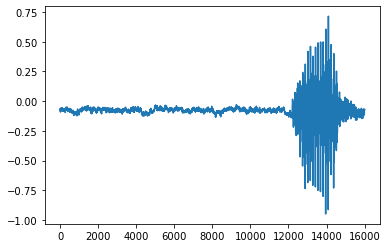

In [3]:
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.plot(waveform.t().numpy());

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


torch.Size([1, 16000])
torch.Size([1, 80, 81])
label is backward
speaker id is 017c4098
torch.Size([1, 16000])
torch.Size([1, 80, 81])


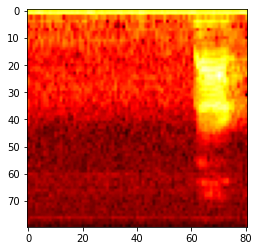

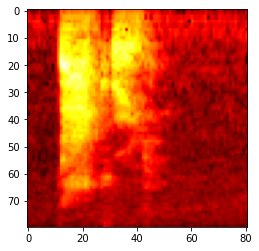

In [5]:
transform=nn.Sequential(torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_mels=80),torchaudio.transforms.AmplitudeToDB())
waveform, sample_rate, label, speaker_id, utterance_number = train_set[0]

print(waveform.shape)
transformed = transform(waveform)
print(transformed.shape)
plt.figure()
plt.imshow(transformed.squeeze().numpy(), cmap='hot')

waveform, sample_rate, label, speaker_id, utterance_number = train_set[1]
print("label is {}".format(label))
print("speaker id is {}".format(speaker_id))
print(waveform.shape)
transformed = transform(waveform)
print(transformed.shape)
plt.figure()
plt.imshow(transformed.squeeze().numpy(), cmap='hot')

In [6]:
n_channels=16

class CommandRecognizerFeatures(nn.Module):
    def __init__(self,n_channels=32):
        super(CommandRecognizerFeatures,self).__init__()
        #look, there are only 80 inputs here
        self.conv = torch.nn.Sequential()
        #classify each instant
        self.conv.add_module("conv_1",nn.Conv2d(1, n_channels, [80,1], stride=[1,1], padding=0))
        self.conv.add_module("relu_1",nn.ReLU())
        self.conv.add_module("norm_1",nn.BatchNorm2d(n_channels))
        #handle short-term correlations
        self.conv.add_module("conv_2",nn.Conv2d(n_channels, n_channels, [1,5], stride=2, padding=[0,1]))
        self.conv.add_module("relu_2",nn.ReLU())
        self.conv.add_module("norm_2",nn.BatchNorm2d(n_channels)) 
        
        #we'll squeeze out dimension #2 here
        self.lstm_size=n_channels
        self.my_lstm=nn.LSTM(n_channels, self.lstm_size, num_layers=2)
        
        #for now, let's take the last hidden elem as the feature vector
        
        
        
        #kernel_size=3
        #stride=2
        #dropout=0
        #n_feats=80
        #n_cnn_layers=5
        
        #self.conv.add_module("maxpool_1",nn.MaxPool2d(kernel_size=2))
        #self.conv.add_module("conv_2",nn.Conv2d(n_channels, n_channels, [kernel_size,1], stride=2, padding=kernel_size//2))
        #self.conv.add_module("relu_2",nn.ReLU())
        #self.conv.add_module("norm_2",nn.BatchNorm2d(n_channels))        
        #self.conv.add_module("conv_3",nn.Conv2d(n_channels, n_channels, [10,1], stride=1, padding=[0,0]))
        #self.conv.add_module("relu_3",nn.ReLU())
        
        
        
    def forward(self, x):
        #print("input shape {}".format(x.shape))
        x = self.conv(x)
        #so now I have something of shape [batch,channels,1,timeslice]
        x=x.squeeze(dim=2).permute(2,0,1)
        #print("ouput shape {}".format(x.shape))  
        output,(h_n,c_n)=self.my_lstm(x)
        #print("final state size {}".format(h_n.shape))
        return h_n[0,:,:]
    
class CommandClassifier(nn.Module):
    def __init__(self,n_channels=32):
        super(CommandClassifier,self).__init__()
        out_size=len(my_labels)
        self.net = torch.nn.Sequential(nn.Linear(n_channels,n_channels),nn.ReLU(),nn.Linear(n_channels,out_size))
        
    def forward(self,x):
        return self.net.forward(x)

    
cr=CommandRecognizerFeatures(n_channels)
cc=CommandClassifier(n_channels)


print("{} parameters".format(sum(p.numel() for p in cr.parameters() if p.requires_grad)))
y=cr.forward(transformed.unsqueeze(0))
print(y.shape)
        


7008 parameters
torch.Size([1, 16])


In [7]:
from torch.utils.data import Dataset,DataLoader,TensorDataset,random_split
import torch.nn.functional as F
import torch.optim as optim
import itertools


def build_label_map():
    label_map={}
    for l in all_labels:
        if l in my_labels:
            ind=my_labels.index(l)
        else:
            ind=0
        label_map[l]=ind
    return label_map
label_map=build_label_map()

def build_speaker_map():
    speaker_array=[]
    speaker_map={}
    for s in all_speakers:
        speaker_map[s]=len(speaker_array)
        speaker_array.append(s)
    return speaker_map
speaker_map=build_speaker_map()

def pad_sequence(batch):
    # Make all tensor in a batch the same length by padding with zeros
    batch = [item.t() for item in batch]
    batch = torch.nn.utils.rnn.pad_sequence(batch, batch_first=True, padding_value=0.)
    return batch.permute(0, 2, 1)


def collate_fn(batch):

    # A data tuple has the form:
    # waveform, sample_rate, label, speaker_id, utterance_number

    tensors, targets = [], []

    # Gather in lists, and encode labels as indices
    for waveform, _, label, *_ in batch:
        tensors += [waveform]
        #targets += [label_to_index(label)]
        targets += [torch.tensor(label_map[label])]

    # Group the list of tensors into a batched tensor
    tensors = pad_sequence(tensors)
    targets = torch.stack(targets)

    return tensors, targets


        
device="cpu"
if device == "cuda":
    num_workers = 1
    pin_memory = True
else:
    num_workers = 0
    pin_memory = False

batch_size=64
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=num_workers,
    pin_memory=pin_memory,
)
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    collate_fn=collate_fn,
    num_workers=num_workers,
    pin_memory=pin_memory,
)

def train_step(optimizer,transform,cr_model,cc_model,dataloader,label_map,speaker_map):
    word_loss=nn.CrossEntropyLoss()
    #speaker_loss=nn.CrossEntropyLoss()
    losses=[]
    sum_loss=0
    loss_report=100
    on_elem=0
    #for waveform, sample_rate, label, speaker_id, utterance_number in dataloader:
    for waveform,label in dataloader:
        waveform=waveform.to(device)
        label=label.to(device)
        transformed=transform(waveform)
        feats=cr_model.forward(transformed)
        word_preds=cc_model.forward(feats)
        #speaker_preds=sp_model.forward()
        loss=word_loss(word_preds,label)
        #loss=word_loss(word_preds,label_map(label))+speaker_loss(speaker_preds,speaker_map(speaker_id))
        optimizer.zero_grad()
        loss.backward()
        #losses.append(loss.item())
        optimizer.step()
        sum_loss+=loss.item()
        on_elem+=1
        if on_elem>loss_report:
            on_elem=0
            print("loss: {}".format(sum_loss))
            losses.append(sum_loss)
            sum_loss=0
    return losses

#optimizer = optim.Adam(itertools.chain(cr.parameters(),cc.parameters()), lr=0.01)

#train_step(optimizer,cr,cc,train_loader,label_map,speaker_map)


In [8]:
def number_of_correct(pred, target):
    # count number of correct predictions
    return pred.squeeze().eq(target).sum().item()


def get_likely_index(tensor):
    # find most likely label index for each element in the batch
    return tensor.argmax(dim=-1)


def test(cr_model,cc_model, epoch):
    cr_model.eval()
    cc_model.eval()
    correct = 0
    for data, target in tqdm(test_loader):

        data = data.to(device)
        target = target.to(device)

        # apply transform and model on whole batch directly on device
        data = transform(data)
        output1 = cr_model(data)
        output=cc_model(output1)

        pred = get_likely_index(output)
        correct += number_of_correct(pred, target)

        # update progress bar
        #pbar.update(pbar_update)

    print(f"\nTest Epoch: {epoch}\tAccuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n")

#test(cr,cc,10)

In [9]:
transform=transform.to(device)
test(cr,cc,0)
optimizer = optim.Adam(itertools.chain(cr.parameters(),cc.parameters()), lr=0.0001)
for i in range(5):
    train_step(optimizer,transform,cr,cc,train_loader,label_map,speaker_map)
    test(cr,cc,i+1)


100%|████████████████████████████████████████████████████████████████████████████████| 172/172 [00:07<00:00, 22.98it/s]



Test Epoch: 0	Accuracy: 412/11005 (4%)

loss: 166.59218215942383
loss: 141.34869766235352
loss: 99.57705640792847
loss: 78.39724117517471
loss: 70.6868000626564
loss: 69.04442474246025
loss: 63.79250746965408
loss: 64.17259991168976
loss: 62.92185425758362
loss: 64.693514585495
loss: 63.796390026807785
loss: 64.4591575562954
loss: 61.60658848285675


100%|████████████████████████████████████████████████████████████████████████████████| 172/172 [00:07<00:00, 23.17it/s]



Test Epoch: 1	Accuracy: 9466/11005 (86%)

loss: 60.74268400669098
loss: 63.61284673213959
loss: 65.93752944469452
loss: 61.44181227684021
loss: 62.30098742246628
loss: 60.168561697006226
loss: 61.50706887245178
loss: 61.52672666311264
loss: 62.54066464304924
loss: 61.791129976511
loss: 61.85097321867943
loss: 61.69045686721802
loss: 63.978805154562


100%|████████████████████████████████████████████████████████████████████████████████| 172/172 [00:07<00:00, 23.12it/s]



Test Epoch: 2	Accuracy: 9466/11005 (86%)

loss: 62.54167151451111
loss: 59.69374558329582


KeyboardInterrupt: 